In [24]:
import os
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.image as mpimg

In [25]:
os.getcwd()
path = os.getcwd()
path

'C:\\Users\\Oguz'

In [42]:
def getJpegFiles():
    os.getcwd()
    os.listdir()
    path = os.getcwd()
    jpg_files = [f for f in os.listdir(path) if f.endswith('.jpg')]
    return jpg_files

def convertRgbToGrayLevel(im1):
    m=im1.shape[0]
    n=im1.shape[1]
    im2=np.zeros((m,n))
    for i in range(m):
        for j in range(n):
            im2[i,j]=getDistance(im1[i,j,:])
    return im2


def getDistance(v,w=[1/3,1/3,1/3]):
    a,b,c=v[0],v[1],v[2]
    w1,w2,w3=w[0],w[1],w[2]
    d = ((a**2)*w1 + (b**2)*w2 + (c**2)*w3)**.5
    
    return d

def getDefaultMaskForMean():
    return np.array([1,1,1,1,1,1,1,1,1]).reshape(3,3)/9

def applyMask(partOfImage):
    mask=getDefaultMaskForMean()
    return sum(sum(partOfImage*mask))
def getMedianFor55(poi):
    s1=poi.reshape(1,25)
    s1.sort()
    return s1[0,13]
def getMedian(poi):
    s1=poi.reshape(1,9)
    s1.sort()
    return s1[0,4]
def getMeanFilterFor55(im1):
    
    m=im1.shape[0]
    n=im1.shape[1]
    im2=np.zeros((m,n))
    for i in range(3,m-3):
        for j in range(3,n-3):
            poi=im1[i-2:i+3,j-2:j+3]
            im2[i,j]=getMedianFor55(poi)
    return im2
def getMeanFilter(im1):
    m=im1.shape[0]
    n=im1.shape[1]
    im2=np.zeros((m,n))
    for i in range(1,m-1):
        for j in range(1,n-1):
            poi = im1[i-1:i+2,j-1:j+2]
            im2[i,j] = getMedian(poi)
    return im2


In [43]:
jpgFiles = getJpegFiles()
catImage1 = mpimg.imread(jpgFiles[1])
catImage2 = convertRgbToGrayLevel(catImage1)
catImage55 = getMeanFilterFor55(catImage2)
catImage555 = getMeanFilter(catImage2)

(<matplotlib.axes._subplots.AxesSubplot at 0x2b40e948fa0>,
 <matplotlib.image.AxesImage at 0x2b40f053640>)

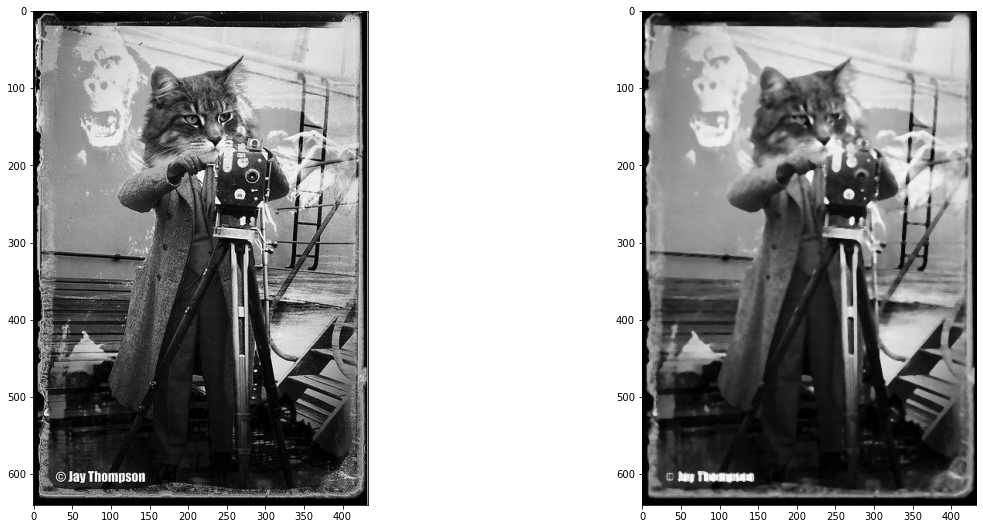

In [44]:
plt.figure(figsize=(20,20))
plt.subplot(2,2,1), plt.imshow(catImage2, cmap = 'gray')
plt.subplot(2,2,2), plt.imshow(catImage55, cmap = 'gray')

(<matplotlib.axes._subplots.AxesSubplot at 0x2b40f0abdc0>,
 <matplotlib.image.AxesImage at 0x2b40f0fc580>)

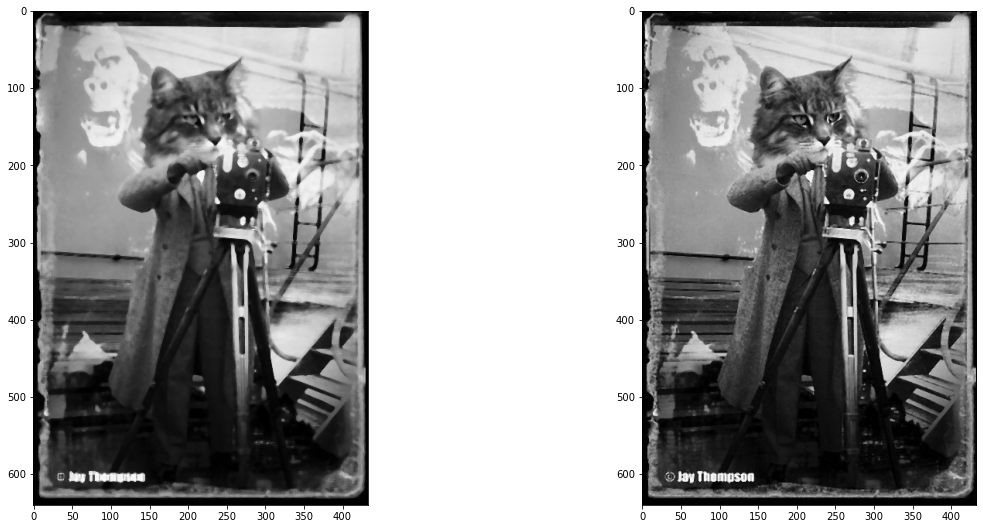

In [45]:
plt.figure(figsize=(20,20))
plt.subplot(2,2,1), plt.imshow(catImage55, cmap = 'gray')
plt.subplot(2,2,2), plt.imshow(catImage555, cmap = 'gray')